# <center>Association Rule Mining</center>


## Overview:

Association rule mining is a technique to identify underlying relations between different items. Take an example of a Super Market where customers can buy variety of items. Usually, there is a pattern in what the customers buy. For instance, mothers with babies buy baby products such as milk and diapers. Damsels may buy makeup items whereas bachelors may buy beers and chips etc. In short, transactions involve a pattern. More profit can be generated if the relationship between the items purchased in different transactions can be identified.

For instance, if item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:

- A and B can be placed together so that when a customer buys one of the product he doesn't have to go far away to buy the other product.
- People who buy one of the products can be targeted through an advertisement campaign to buy the other.
- Collective discounts can be offered on these products if the customer buys both of them.
- Both A and B can be packaged together.

The process of identifying an associations between products is called association rule mining.

Association rule learning is the rule-based machine learning method for discovering interesting relations between variables in large databases using some measure of interestingness. Apriori algorithm is one such algorithm that is used to identify these strong rules. It is an algorithm for frequent item set mining and association rule learning over relational databases.

## Introduction:

Frequent pattern mining algorithm is one of the most important techniques of data mining to discover relationships between different items in a dataset. These relationships are represented in the form of association rules.
Apriori is an algorithm used to identify frequent item sets (in our case, item pairs). It does so by using a "bottom up" approach, first identifying individual items that satisfy a minimum occurrence threshold. It then extends the item set, adding one item at a time and checking if the resulting item set still satisfies the specified threshold. The algorithm stops when there are no more items to add that meet the minimum occurrence requirement.
A set of items together is called an Itemset. An itemset that occurs frequently is called frequent itemset. A set of items is called frequent if it satisfies a minimum threshold value for support & confidence.

Association rule mining is defined as:

    “Let I = {….} be a set of ‘n’ binary attributes called items. Let D = {….} be the set of transactions called database. Each transaction in D has a unique transaction ID and contains a subset of item in I. A rule is defined as an implication of the form A->B where A, B (subset symbol) I. The set of items A and B are called antecedent and consequent of the rules respectively.”
    
    
## Various Metric in Measure Association:

There are five key metrics to consider when evaluating association rules-

### Support

This is the percentage of orders that contain the item set. The minimum support required by apriori can be set based on knowledge of your domain. In the grocery dataset for example, since there could be thousands of distinct items and an order can contain only a small fraction of these items, setting the support threshold to 0.01% may be reasonable.

### Confidence

Given two items, A and B, confidence measures the percentage of items that B is purchased, given that item A was purchased.
This is expressed as:

    Confidence(A->B) = support (A, B) / support (A)
    
Confidence values range from 0 to 1, where 0 indicates that B is never purchased when A is purchased, and 1 indicates that B is always purchased whenever A is purchased. Note that the confidence measure is directional. This means that we can also compute the percentage of times that items A is purchased, given that item B was purchased.

    Confidence(B->A) = support (A, B) / support(B)
    
A confidence value of 0.75 implies that out of all orders that contain A, 75% of them also contain B.

### Lift 

Given two items, A and B, lift indicates whether there is a relationship between A and B, or whether the two items are occurring together in the same orders simply by chance (i.e. at random). Unlike the confidence metric whose value may vary depending on the direction, lift has no direction. This means that the lift (A, B) is always equal to the lift (B, A).

    Lift (A, B) = Lift (B, A) = Confidence(B->A)/support(A) = support (A, B)/(support(A) * support(B))
    
One way to understand lift is to think of the denominator as the likelihood that A and B will appear in the same order if there was no relationship between them. If suppose A occurred in 80% of the orders and B occurred in 60% of the orders, then if there was no relationship between them, we would expect both of them to show up together in the same order 48% of the time (ie: 80% * 60%). The numerator, on the other hand, represents how often A and B actually appear together in the same order. Taking the numerator and dividing it by the denominator, we get to know how many more times A and B actually appear in the same order, compared to if there was no relationship between them (i.e.: that they are occurring together simply at random).

In summary, lift can take on the following values:
    - Lift = 1 implies no relationship between A and B (ie: A & B occur together only by chance).
    - Lift > 1 implies that there is a positive relationship between A & B. (i.e.: A & B occur  together more often than random).
    - Lift < 1 implies that there is a negative relationship between A & B (i.e.: A & B occur together less often than random).
    
### Leverage
$$\text{levarage}(A\rightarrow C) = \text{support}(A\rightarrow C) - \text{support}(A) \times \text{support}(C), \;\;\; \text{range: } [-1, 1]$$

Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

### Conviction
$$\text{conviction}(A\rightarrow C) = \frac{1 - \text{support}(C)}{1 - \text{confidence}(A\rightarrow C)}, \;\;\; \text{range: } [0, \infty]$$

A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.
    
## Steps involved in Apriori Algorithm

For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. For instance, Lift can be calculated for item 1 and item 2, item 1 and item 3, item 1 and item 4 and then item 2 and item 3, item 2 and item 4 and then combinations of items e.g. item 1, item 2 and item 3; similarly item 1, item2, and item 4, and so on.

As you can see from the above example, this process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

- Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
- Extract all the subsets having higher value of support than minimum threshold.
- Select all the rules from the subsets with confidence value higher than minimum threshold.
- Order the rules by descending order of Lift.

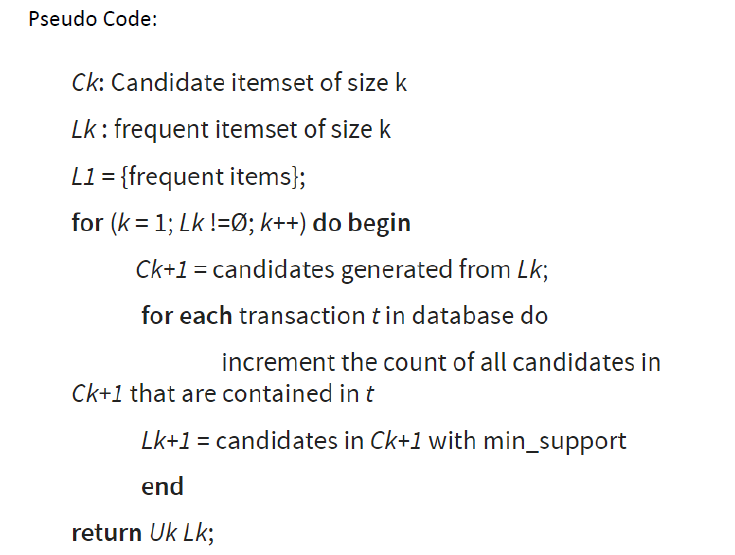

In [1]:
from IPython.display import Image
Image(filename='pseudocode.png') 

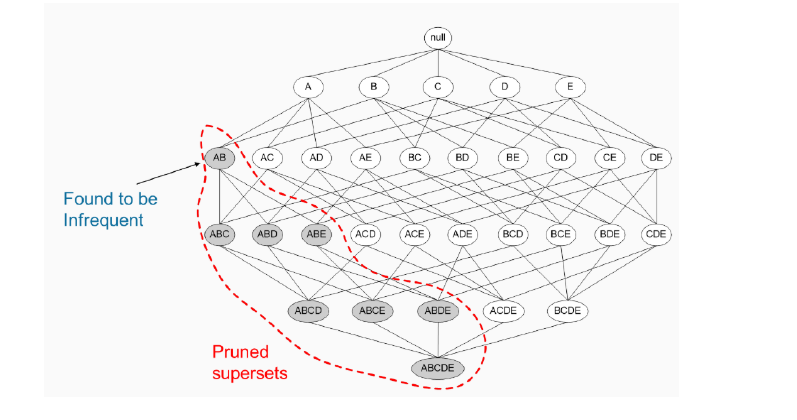

In [2]:
Image(filename='image.png') 

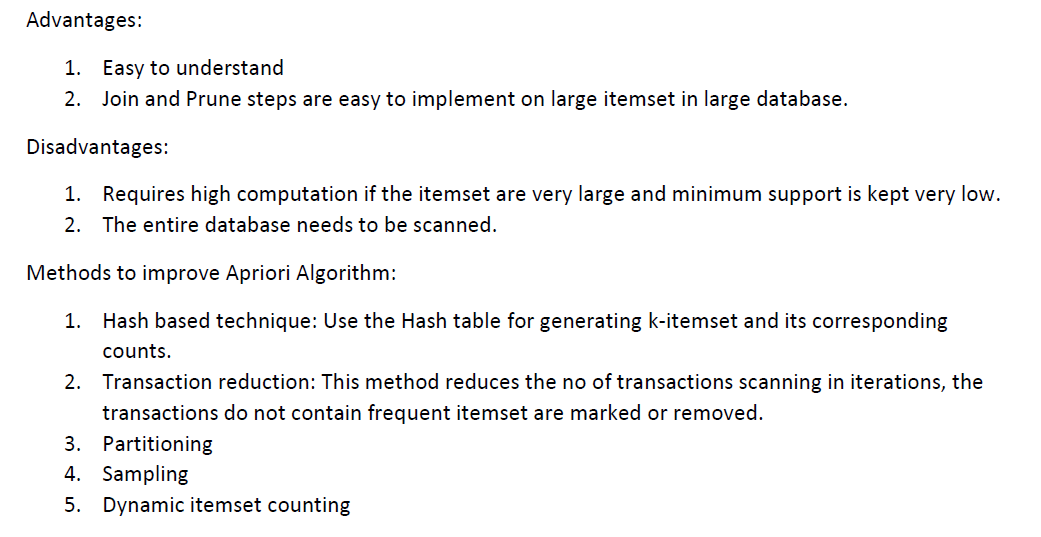

In [4]:
Image(filename='advantages_disadvantages.png') 

In [5]:
! pip install mlxtend

# Apriori Algorithm on Bread-Basket Data Set

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("./BreadBasket_DMS.csv",delimiter=',')
df.head(30)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [8]:
df.shape

(21293, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [10]:
df.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [11]:
df.loc[df['Item']=='NONE',:]

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [12]:
df.drop(df.loc[df['Item']=='NONE',:].index,axis=0,inplace=True)

In [13]:
df.shape

(20507, 4)

In [14]:
hot_encoded_df = df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [15]:
hot_encoded_df.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [17]:
hot_encoded_df.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
hot_encoded_df.shape

(9465, 94)

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

In [20]:
freq_itemsets = apriori(hot_encoded_df, min_support=0.005,use_colnames = True)

In [21]:
apriori?

Signature:
apriori(
    df,
    min_support=0.5,
    use_colnames=False,
    max_len=None,
    verbose=0,
    low_memory=False,
)
Docstring:
Get frequent itemsets from a one-hot DataFrame

Parameters
-----------
df : pandas DataFrame
  pandas DataFrame the encoded format. Also supports
  DataFrames with sparse data; for more info, please
  see (https://pandas.pydata.org/pandas-docs/stable/
       user_guide/sparse.html#sparse-data-structures)

  Please note that the old pandas SparseDataFrame format
  is no longer supported in mlxtend >= 0.17.2.

  The allowed values are either 0/1 or True/False.
  For example,

```
         Apple  Bananas   Beer  Chicken   Milk   Rice
    0     True    False   True     True  False   True
    1     True    False   True    False  False   True
    2     True    False   True    False  False  False
    3     True     True  False    False  False  False
    4    False    False   True     True   True   True
    5    False    False   True    False   True   Tru

In [22]:
freq_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.005071,(Bakewell)
3,0.327205,(Bread)
4,0.040042,(Brownie)
...,...,...
109,0.007184,"(Bread, Sandwich, Coffee)"
110,0.007396,"(Bread, Tea, Coffee)"
111,0.006867,"(Cake, Coffee, Hot chocolate)"
112,0.010037,"(Tea, Coffee, Cake)"


In [23]:
rules = association_rules(freq_itemsets, metric='confidence',min_threshold=0.4)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
3,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
4,(Hearty & Seasonal),(Coffee),0.010565,0.478394,0.005705,0.540000,1.128777,0.000651,1.133926
5,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
6,(Jammie Dodgers),(Coffee),0.013207,0.478394,0.006656,0.504000,1.053525,0.000338,1.051625
7,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
8,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431
9,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871


In [24]:
rules.shape

(25, 9)

In [25]:
association_rules?

Signature:
association_rules(
    df,
    metric='confidence',
    min_threshold=0.8,
    support_only=False,
)
Docstring:
Generates a DataFrame of association rules including the
metrics 'score', 'confidence', and 'lift'

Parameters
-----------
df : pandas DataFrame
  pandas DataFrame of frequent itemsets
  with columns ['support', 'itemsets']

metric : string (default: 'confidence')
  Metric to evaluate if a rule is of interest.
  **Automatically set to 'support' if `support_only=True`.**
  Otherwise, supported metrics are 'support', 'confidence', 'lift',
  'leverage', and 'conviction'
  These metrics are computed as follows:

  - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]

  - confidence(A->C) = support(A+C) / support(A), range: [0, 1]

  - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]

  - leverage(A->C) = support(A->C) - support(A)*support(C),
    range: [-1, 1]

  - conviction = [1 - support(C)] / [1 - confidence(A->C)],
    range: [0, inf]


min_th

In [26]:
rules[ (rules['lift'] > 1.1) & (rules['confidence'] > 0.5) & (rules['support'] > 0.02)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
9,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
11,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
13,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
